# DIY Exercises - 1 : Outliers

In [42]:
import statsmodels.api as sm
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv("accord_sedan.csv", header = 0)
df.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


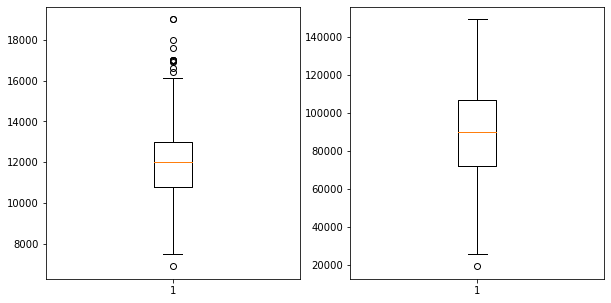

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.boxplot(df["price"]);
ax2.boxplot(df["mileage"]);

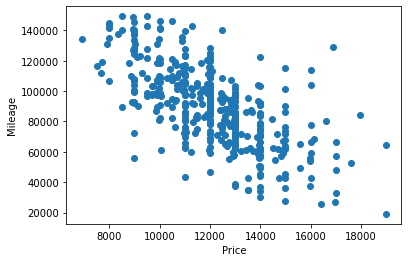

In [4]:
plt.scatter(df["price"], df["mileage"]);
plt.xlabel("Price");
plt.ylabel("Mileage");

In [5]:
meanPrice = df["price"].mean()
meanMileage = df["mileage"].mean()
stdPrice = df["price"].std()
stdMileage = df["mileage"].std()
print(meanPrice, meanMileage, stdPrice, stdMileage)

12084.242206235012 89725.7793764988 2061.430033967955 25957.872270688917


In [10]:
df["isOutlierPrice"] = np.where(((df["price"] < meanPrice - 3 * stdPrice) | (df["price"] > meanPrice + 3 * stdPrice)), 1, 0);
df["isOutlierMilage"] = np.where(((df["mileage"] < meanMileage - 3 * stdMileage) | (df["mileage"] > meanMileage +3 * stdMileage)), 1, 0);
df_outliers = df.loc[(df["isOutlierPrice"] == 1) | (df["isOutlierMilage"] == 1)]
df_outliers.head()

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMilage
270,18988,19160,2006,ex,4 Cyl,Automatic,1,0
379,18995,64570,2006,ex,6 Cyl,Automatic,1,0


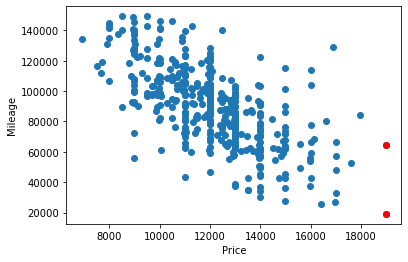

In [11]:
plt.scatter(df["price"], df["mileage"]);
plt.scatter(df_outliers["price"], df_outliers["mileage"], color = "r")
plt.xlabel("Price");
plt.ylabel("Mileage");

# DIY Exercises - 2 : Q-Q Plots

In [20]:
df_2 = pd.read_csv("TB_burden_countries_2014-09-29.csv", header = 0)
df_2.fillna("0", inplace = True)
df_2_numeric = df_2.apply(pd.to_numeric, errors='ignore')
df_2_numeric.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,0.0,0.0,0.0
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,0.0,0.0,0.0
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,0.0,0.0,0.0


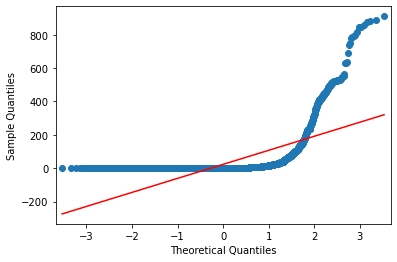

In [28]:
fig = sm.qqplot(df_2_numeric["e_inc_tbhiv_100k_lo"], line = "s")
plt.show()

# DIY Exercises - 3 : Distributions & Sampling & Robust Statistics

In [34]:
sample_5 = np.random.normal(size = 5)
sample_10 = np.random.normal(loc = 1, scale = 2,size = 10)
sample_100 = np.random.normal(loc = -2, scale = 5,size = 100)

In [41]:
print(sample_5.mean(), np.std(sample_5), stats.skew(sample_5), stats.kurtosis(sample_5))
print(sample_10.mean(), np.std(sample_10), stats.skew(sample_10), stats.kurtosis(sample_10))
print(sample_100.mean(), np.std(sample_100), stats.skew(sample_100), stats.kurtosis(sample_100))

0.31938367796747313 0.34152956129159245 1.4911156910944736 0.23781700518496995
0.6418693249507413 2.055993026076531 0.8288530704487203 -0.17017888876066678
-2.7792794019023206 4.804425119238546 0.18275711210936704 -0.27989499612835056


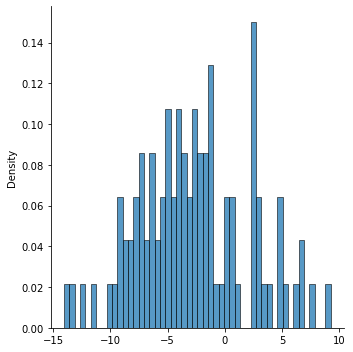

In [45]:
sns.displot(data=sample_100, kind='hist', bins=50, stat='density')